In [1]:
import pandas as pd
import numpy as np

# Assignment Part 1

#### import requests, Beautiful soup to scrape the table, convert it into pandas df

In [2]:
import requests

from bs4 import BeautifulSoup

url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

soup = BeautifulSoup(url.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

canada_df=pd.DataFrame(df[0])

canada_df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


#### Replace 'Not assigned' with nan, then drop rows in Borough that have 'Not assigned'

In [3]:
canada_df = canada_df.replace('Not assigned',np.nan, regex=True)
canada_df.dropna(subset=["Borough"], axis=0, inplace=True)
canada_df = canada_df.reset_index(drop=True)
canada_df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


#### Check any NaN values 

In [4]:
print('Number of nan of Neighbourhood:',canada_df['Neighbourhood'].isnull().sum())
print('Number of nan of Borough:',canada_df['Borough'].isnull().sum())

Number of nan of Neighbourhood: 0
Number of nan of Borough: 0


#### Check the shape of the df

In [5]:
canada_df.shape

(103, 3)

# Assignment Part 2

#### Create pandas df of geospatial coordinates 

In [6]:
geospatial=pd.read_csv("http://cocl.us/Geospatial_data")
geospatial

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


#### merge two tables

In [7]:
df_merged=pd.merge(canada_df, geospatial, how="left", on="Postal Code")
df_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


#### Will examine Downtown Toronto and see nearby venues

In [8]:
toronto_df = df_merged[df_merged['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
toronto_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [9]:
toronto_df.shape

(19, 5)

# Assignment Part 3

In [10]:
CLIENT_ID = 'XFZG5E2VULTIR4O2SBXOKD3PBQ0OPSQE3V3WZLPXSDSOEM1V' 
CLIENT_SECRET = 'VALXMO0A4DYC5HN2PPUYTMW1BZ5303VLHWVW3OLLH3UZBTJX' 
VERSION = '20180604' 
LIMIT = 100 

#### Get info about nearby venues of the first row of toronto_df 

In [11]:
latitude = toronto_df.loc[0, 'Latitude'] 
longitude = toronto_df.loc[0, 'Longitude'] 
name = toronto_df.loc[0, 'Neighbourhood'] 

LIMIT = 100 # First 100
radius = 1000 # in meters

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=XFZG5E2VULTIR4O2SBXOKD3PBQ0OPSQE3V3WZLPXSDSOEM1V&client_secret=VALXMO0A4DYC5HN2PPUYTMW1BZ5303VLHWVW3OLLH3UZBTJX&v=20180604&ll=43.6542599,-79.3606359&radius=1000&limit=100'

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd7ca2fe08ec61addeca857'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 112,
  'suggestedBounds': {'ne': {'lat': 43.66325990900001,
    'lng': -79.3482199002972},
   'sw': {'lat': 43.64525989099999, 'lng': -79.37305189970282}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label':

#### Set up the function that extracts the category of the venues, transfer JSON files in pandas df, create a list of venues 

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories'] 
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name'] 

In [14]:
# tranform JSON file into a pandas dataframe, and see the first row
from pandas.io.json import json_normalize 
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) 
nearby_venues.loc[0]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


referralId                                            e-0-54ea41ad498e9a11e9e13308-0
reasons.count                                                                      0
reasons.items                      [{'summary': 'This spot is popular', 'type': '...
venue.id                                                    54ea41ad498e9a11e9e13308
venue.name                                                          Roselle Desserts
venue.location.address                                                 362 King St E
venue.location.crossStreet                                                Trinity St
venue.location.lat                                                           43.6534
venue.location.lng                                                           -79.362
venue.location.labeledLatLngs      [{'label': 'display', 'lat': 43.65344672305267...
venue.location.distance                                                          143
venue.location.postalCode                                        

In [15]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Impact Kitchen,Restaurant,43.656369,-79.356980
4,The Distillery Historic District,Historic Site,43.650244,-79.359323
...,...,...,...,...
95,The Jason George,Pub,43.649824,-79.371095
96,Shoppers Drug Mart,Pharmacy,43.660204,-79.361332
97,King's Place647-352-0786,Pakistani Restaurant,43.658278,-79.370925
98,Wendy’s,Fast Food Restaurant,43.660403,-79.360629


In [16]:
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Impact Kitchen,Restaurant,43.656369,-79.356980
4,The Distillery Historic District,Historic Site,43.650244,-79.359323


In [17]:
nearby_venues.shape

(100, 4)

#### create a function to repeat the same process to all the neighborhoods in Toronto

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Use the function on toronto_df

In [19]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )
toronto_venues

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
...,...,...,...,...,...,...,...
1243,Church and Wellesley,43.66586,-79.383160,Noah's Natural Foods,43.668532,-79.385885,Food & Drink Shop
1244,Church and Wellesley,43.66586,-79.383160,Bishop and Belcher,43.670096,-79.382354,Pub
1245,Church and Wellesley,43.66586,-79.383160,Croissant Tree,43.669575,-79.382331,Coffee Shop
1246,Church and Wellesley,43.66586,-79.383160,Asahi Sushi,43.669874,-79.382943,Sushi Restaurant


#### Check to see how many venues are extracted for each Neighborhood

In [20]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,68,68,68,68,68,68
Christie,16,16,16,16,16,16
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


In [21]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 210 uniques categories.


#### Get dummy variables for each category

In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe --> add 'Neighborhood' in manhattan_venues to manhattan_onehot
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

toronto_onehot.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Calculate means for each category

In [23]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.018182,0.000000,0.000000,0.000000,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Central Bay Street,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.014706,0.000000,0.000000,0.014706,0.014706
3,Christie,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Church and Wellesley,0.013333,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.013333,0.000000,...,0.013333,0.013333,0.00,0.00,0.00,0.000000,0.000000,0.013333,0.000000,0.026667
5,"Commerce Court, Victoria Hotel",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.040000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.020000,0.000000,0.000000,0.010000,0.000000
6,"First Canadian Place, Underground city",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.030000,0.000000,...,0.010000,0.000000,0.00,0.00,0.01,0.010000,0.000000,0.000000,0.010000,0.000000
7,"Garden District, Ryerson",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.020000,0.000000,0.01,0.00,0.00,0.000000,0.010000,0.010000,0.010000,0.000000
8,"Harbourfront East, Union Station, Toronto Islands",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.010000,0.000000,0.00,0.00,0.01,0.010000,0.000000,0.000000,0.010000,0.000000
9,"Kensington Market, Chinatown, Grange Park",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.054054,0.000000,0.040541,0.013514,0.000000


#### Top 5 categories for each neighborhood

In [24]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1      Restaurant  0.04
2     Cheese Shop  0.04
3  Farmers Market  0.04
4          Bakery  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0      Airport Lounge  0.12
1     Airport Service  0.12
2             Airport  0.06
3  Airport Food Court  0.06
4        Airport Gate  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.06
2      Sandwich Place  0.04
3  Italian Restaurant  0.04
4     Thai Restaurant  0.03


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3    Candy Store  0.06
4     Restaurant  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.09
1  Japanese Restaurant  0.05
2     Sushi Restaurant  0.05
3              Gay Bar  0.05
4           Restauran

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Beer Bar,Cocktail Bar,Bakery,Cheese Shop,Farmers Market,Restaurant,Seafood Restaurant,Italian Restaurant,Beach
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Sculpture Garden,Harbor / Marina,Plane,Rental Car Location,Boat or Ferry,Coffee Shop,Bar,Boutique
2,Central Bay Street,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Bubble Tea Shop,Salad Place,Japanese Restaurant,Department Store,Thai Restaurant,Burger Joint
3,Christie,Grocery Store,Café,Park,Baby Store,Nightclub,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Candy Store
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Yoga Studio,Men's Store,Mediterranean Restaurant,Hotel,Pub


#### k-means clustering analysis

In [27]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

# delete the fitst column "Neighborhood"
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int32)

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [29]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Berczy Park,Coffee Shop,Beer Bar,Cocktail Bar,Bakery,Cheese Shop,Farmers Market,Restaurant,Seafood Restaurant,Italian Restaurant,Beach
1,3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Sculpture Garden,Harbor / Marina,Plane,Rental Car Location,Boat or Ferry,Coffee Shop,Bar,Boutique
2,2,Central Bay Street,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Bubble Tea Shop,Salad Place,Japanese Restaurant,Department Store,Thai Restaurant,Burger Joint
3,4,Christie,Grocery Store,Café,Park,Baby Store,Nightclub,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Candy Store
4,2,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Yoga Studio,Men's Store,Mediterranean Restaurant,Hotel,Pub
5,2,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Hotel,Café,American Restaurant,Gym,Seafood Restaurant,Deli / Bodega,Japanese Restaurant,Italian Restaurant
6,2,"First Canadian Place, Underground city",Coffee Shop,Café,Hotel,Japanese Restaurant,Restaurant,Gym,American Restaurant,Asian Restaurant,Steakhouse,Deli / Bodega
7,2,"Garden District, Ryerson",Clothing Store,Coffee Shop,Café,Cosmetics Shop,Bubble Tea Shop,Japanese Restaurant,Ramen Restaurant,Bookstore,Fast Food Restaurant,Middle Eastern Restaurant
8,2,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Café,Hotel,Scenic Lookout,Restaurant,Brewery,Fried Chicken Joint,Italian Restaurant,Music Venue
9,2,"Kensington Market, Chinatown, Grange Park",Café,Vegetarian / Vegan Restaurant,Coffee Shop,Bar,Mexican Restaurant,Vietnamese Restaurant,Burger Joint,Pizza Place,Bakery,Dumpling Restaurant


In [30]:
toronto_merged = toronto_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Theater,Café,Yoga Studio,Event Space,Performing Arts Venue
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Yoga Studio,Portuguese Restaurant,Smoothie Shop,Italian Restaurant,Beer Bar,Sandwich Place,Restaurant,Distribution Center,Diner
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Clothing Store,Coffee Shop,Café,Cosmetics Shop,Bubble Tea Shop,Japanese Restaurant,Ramen Restaurant,Bookstore,Fast Food Restaurant,Middle Eastern Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Coffee Shop,Café,Cocktail Bar,Restaurant,Gastropub,Beer Bar,American Restaurant,Clothing Store,Cosmetics Shop,Seafood Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,2,Coffee Shop,Beer Bar,Cocktail Bar,Bakery,Cheese Shop,Farmers Market,Restaurant,Seafood Restaurant,Italian Restaurant,Beach


#### Create a map

In [31]:
! pip install folium==0.5.0

import folium

     |████████████████████████████████| 79 kB 11.4 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=bb19db222ba0500013b105bf7c2df8feb62bc738e5db6f5f7e84e2bdbfcea585
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium


In [32]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [34]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Since on Github, maps created by Folium cannot be displayed, so here is the same image of what I got from the code above: 

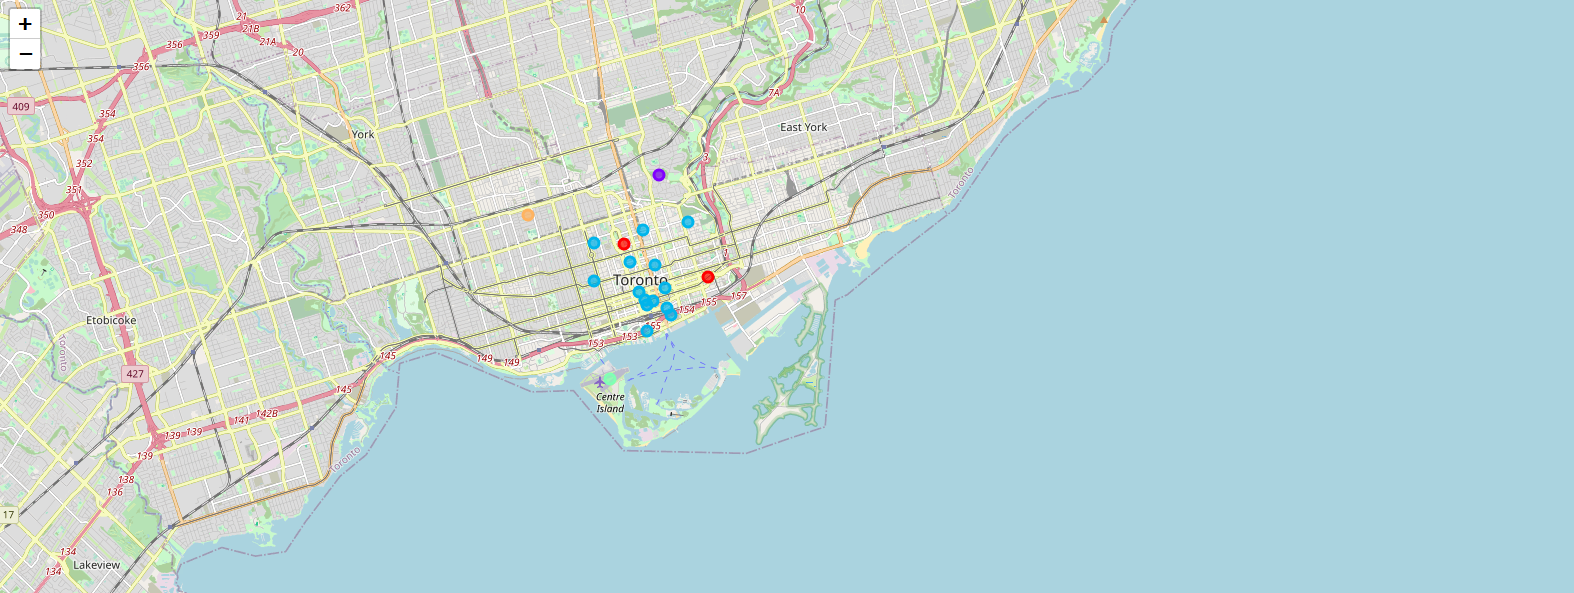

#### Observations
#### We see that neighborhoods that are similar in venue categories are located around the center of Toronto (blue dots). 
#### Neighborhoods outside of the center of Toronto have different types of venues (red, purple, and orange dots) than the ones in the center of Toronto. 
#### At the airport (Billy Bishop Toronto City Airport), we see a light green dot, meaning that there are more unique types of venues that are not common outside the airport in Toronto. 